### Explanation
This code identifies bacterial colonies from Petri dish time-lapse images and based on the fluorescent signal it is able to compute a characteristic pattern signal for each fluorescent protein. With this information, the code classify each of the identified colonies. You can see the mathematical development at [Colony classificator maths](https://github.com/SynBioUC/FluoPi/blob/master/Maths/Colony%2Bclassificator%2Bmaths.pdf).

##### Requirements
 - Image data
 - Have _fluopi_ module installed (open Terminal in Mac or command line in Windows and type  `pip install fluopi`; more info [here](https://packaging.python.org/tutorials/installing-packages/) about installing python packages)


## Analysis


### Loading packages

In [1]:
# import some useful packages to manage the data

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os.path

# modify some matplotlib parameters to manage the images in illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
# Import the FluoPi module
import fluopi.analysis as flua
import fluopi.plotting as flup

### Loading Data
In this section you have to include the path of the data to be used. Be careful because it asumes you have the images in a subfolder in the same path as this notebook. If you have the images in another external folder you have to include the full path direction (e.g. _'C/myuser/.../my_images_folder'_)

If you downloaded all the github repository you should have the images in the subfolder _'Images/'_ and then the path should be up and ready.

Also, the example data can be obtained from the **_Files_** section in the [OSF FluoPi proyect](https://osf.io/dy6p2/). There you can download it from the *Google drive/Example_data/Classifier* folder.Moreover, there you can found other image series of your interest.

In each _pathname_ is the complete path of the folder where images are stored.

In [3]:
pathname1 = os.path.abspath('Images/Classifier/sfGFP_data/')
#refered to google drive folder Example_data\Classifier\sfGFP_data`
                      
pathname2 = os.path.abspath('Images/Classifier/CyOFP_data/')
#refered to google drive folder Example_data\Classifier\CyOFP_data

pathname3 = os.path.abspath('Images/Classifier/BeRFP_data/')
#refered to google drive folder Example_data\Classifier\BeRFP_data

pathname4 =  os.path.abspath('Images/Classifier/RGO_data/')
#refered to google drive folder Example_data\Classifier\RGO_data

Then, make the image names:

In [4]:
fname1 = os.path.join(pathname1, "image_%04d"+".jpg")
                      
fname2 = os.path.join(pathname2, "image_%04d"+".jpg")

fname3 = os.path.join(pathname3, "image_%04d"+".jpg")

fname4 =  os.path.join(pathname4, "image_%04d"+".jpg")

And also save the number name of the last image

In [5]:
lim1=int(os.listdir(pathname1)[-1].split('_')[-1].split('.')[0])
lim2=int(os.listdir(pathname2)[-1].split('_')[-1].split('.')[0])
lim3=int(os.listdir(pathname3)[-1].split('_')[-1].split('.')[0])
lim4=int(os.listdir(pathname4)[-1].split('_')[-1].split('.')[0])

Let's check the data loading and channel structure (e.g. with the last frame image of the second data set)

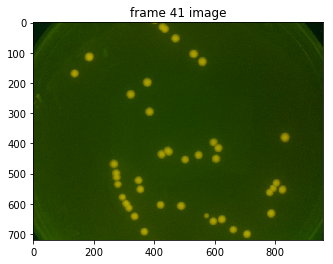

In [6]:
flup.plot_im_frame(fname2,lim2)

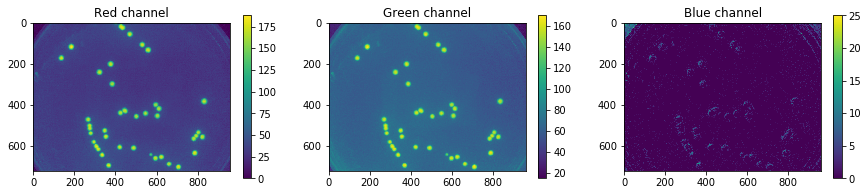

In [7]:
flup.plt_im_frame_channels(fname2,lim2)

Count the files in each data set:

In [8]:
imCount1=flua.count_files(pathname1,"jpg")
imCount2=flua.count_files(pathname2,"jpg")
imCount3=flua.count_files(pathname3,"jpg")
imCount4=flua.count_files(pathname4,"jpg")

sfGFP_data = 40 files
CyOFP_data = 42 files
BeRFP_data = 42 files
RGO_data = 42 files


Now, we organize the data and split it into the different channels. Also, here you can define with frames of the whole original data you are going to use (i.e. by defining `frame > 1` you can select which data to use)

In [9]:
DataS1={}
frames1 = 10   # use one image every 10 frames
DataS1['R'],DataS1['G'],DataS1['B']=flua.get_im_data(frames1,imCount1,fname1)
DataS1['Im']=fname1     # to store the related image source

In [10]:
DataS2={}
frames2 = 5     
DataS2['R'],DataS2['G'],DataS2['B']=flua.get_im_data(frames2,imCount2,fname2)
DataS2['Im']=fname2

In [11]:
DataS3={}
frames3 = 5     
DataS3['R'],DataS3['G'],DataS3['B']=flua.get_im_data(frames3,imCount3,fname3) 
DataS3['Im']=fname3

In [12]:
DataS4={}
frames4 = 5    
DataS4['R'],DataS4['G'],DataS4['B']=flua.get_im_data(frames4,imCount4,fname4)
DataS4['Im']=fname4

Now we have each data serie on a dictionary, organized in arrays for each channel.

### Background subtraction
First step is to identify a good background area and compute his value over time:

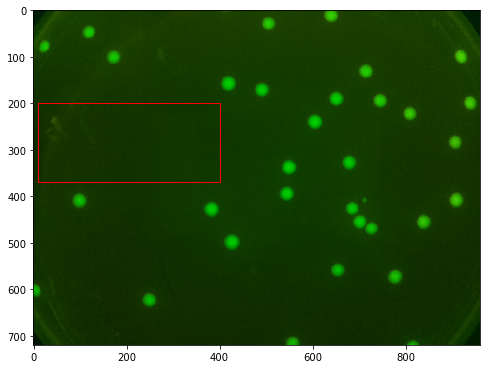

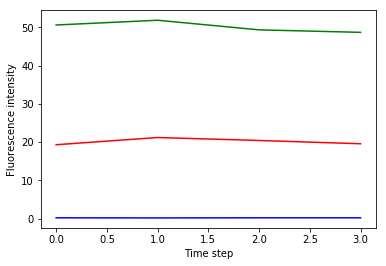

In [13]:
BG1=flua.bg_value(200,370,10,400,DataS1,imCount1)

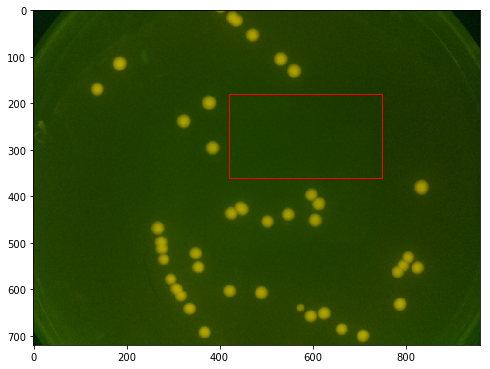

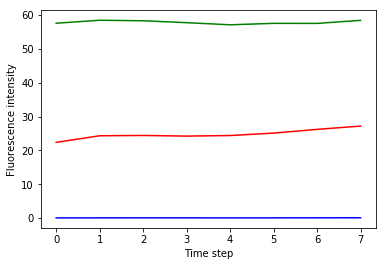

In [14]:
BG2=flua.bg_value(180,360,420,750,DataS2,imCount2)

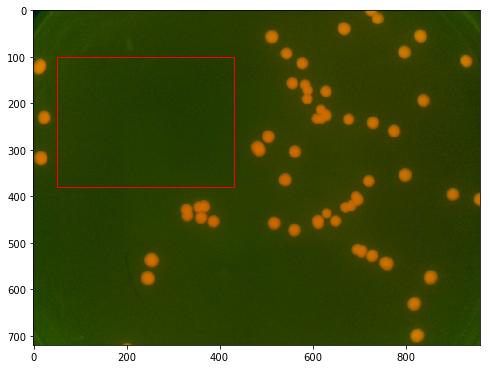

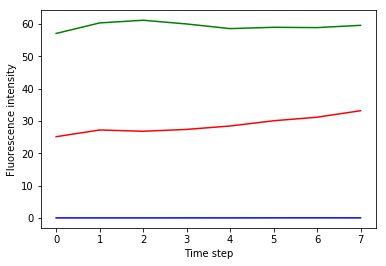

In [15]:
BG3=flua.bg_value(100,380,50,430,DataS3,imCount3)

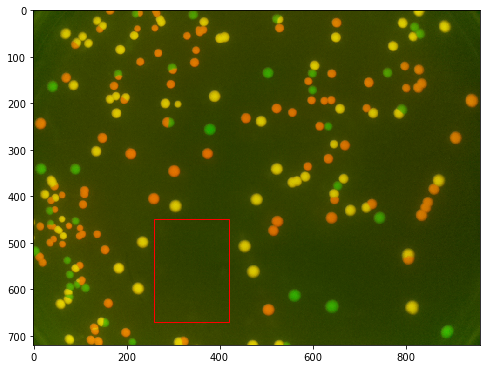

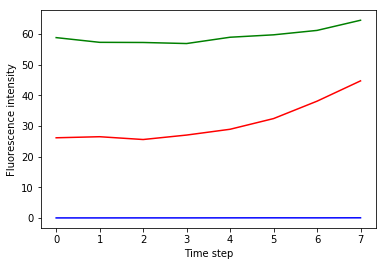

In [16]:
BG4=flua.bg_value(450,670,260,420,DataS4,imCount4)

We can subtract this background vector value to each frame on the data to eliminate the background effect

In [17]:
DataSB1=flua.bg_subst(DataS1,BG1)

In [18]:
DataSB2=flua.bg_subst(DataS2,BG2)

In [19]:
DataSB3=flua.bg_subst(DataS3,BG3)

In [20]:
DataSB4=flua.bg_subst(DataS4,BG4)

### Get colony position
A good way to identify where colonies are situated is by summing the value of each pixel for all the channels and all the frames

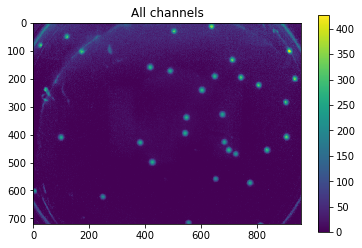

In [21]:
SumData1=flua.data_sum_time(DataSB1)

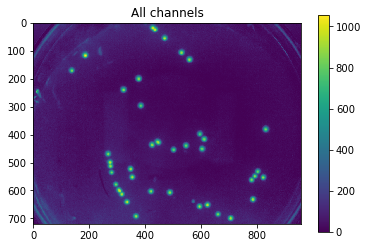

In [22]:
SumData2=flua.data_sum_time(DataSB2)

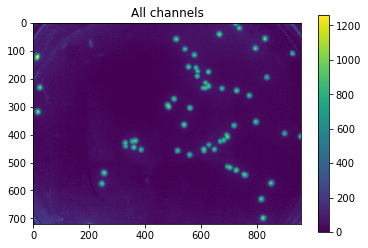

In [23]:
SumData3=flua.data_sum_time(DataSB3)

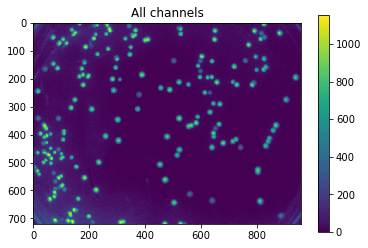

In [24]:
SumData4=flua.data_sum_time(DataSB4)

####  Apply a filter to smooth the data 
This process let us reduce noise and improve border detection

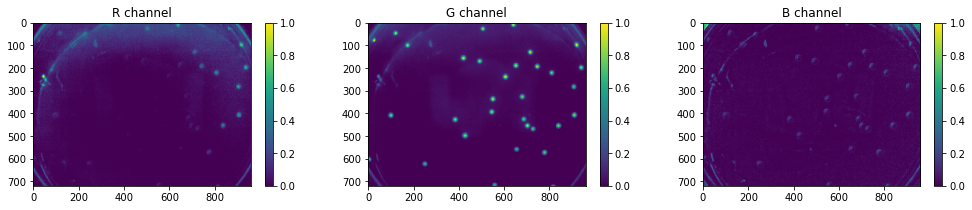

In [25]:
sDatS1,sDatSall1,SDatST1=flua.smooth_data(DataSB1,1.5)

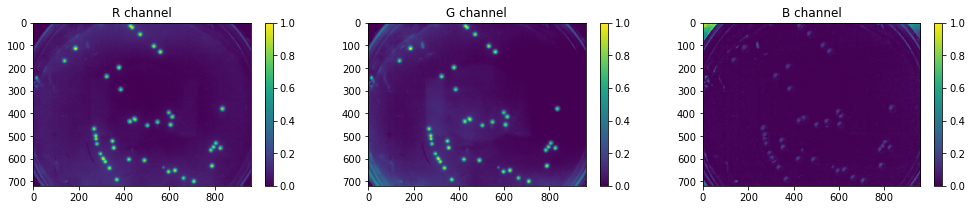

In [26]:
sDatS2,sDatSall2,SDatST2=flua.smooth_data(DataSB2,1.5)

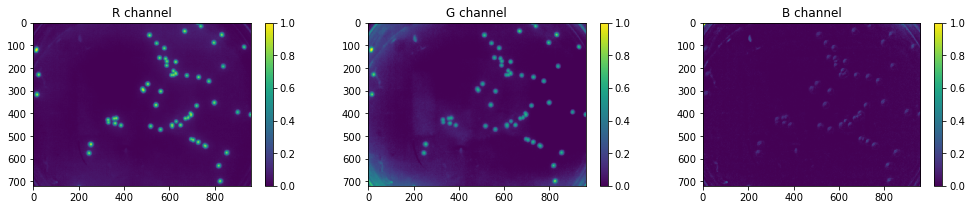

In [27]:
sDatS3,sDatSall3,SDatST3=flua.smooth_data(DataSB3,1.5)

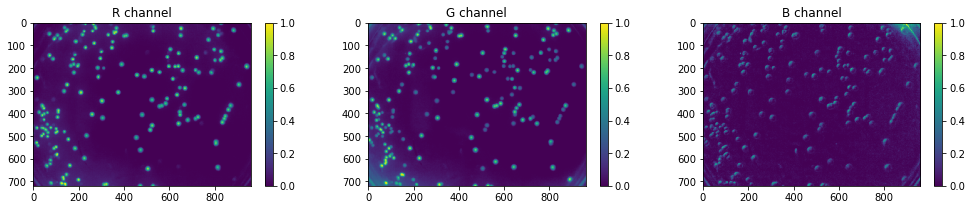

In [28]:
sDatS4,sDatSall4,SDatST4=flua.smooth_data(DataSB4,1.5)

### Blob detection

To properly identification, it's important to set the **threshold value** for each dataset manually (_i.e._ Define it based on the previous colormap)

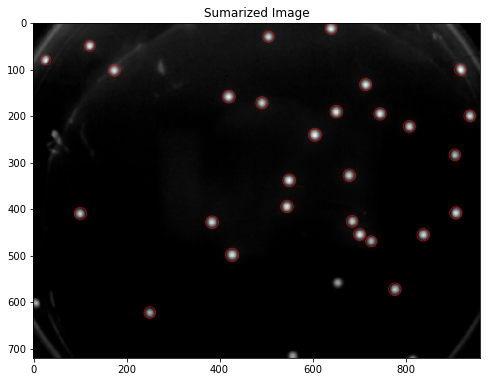

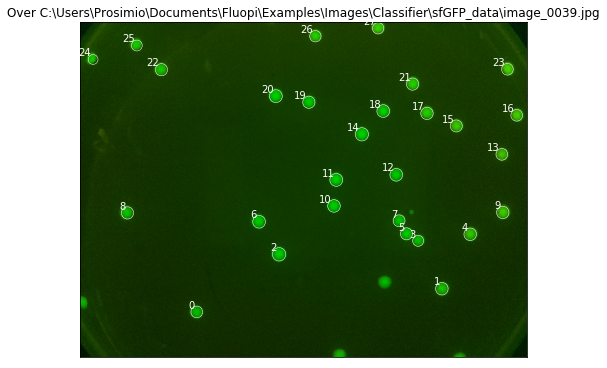

In [29]:
#blobD1 = flua.colony_blobs_id(sDatS1['G'],0.35,DataS1['Im']%(lim1-1)) 
#for green it was better to use only the green channel

blobD1 = flua.colony_blobs_id(sDatS1['G'],0.35,DataS1['Im']%(lim1),filename='Plots/Classifier/Blobs_sfGFP') 

# Threshold is the second argument e.g. 0.35

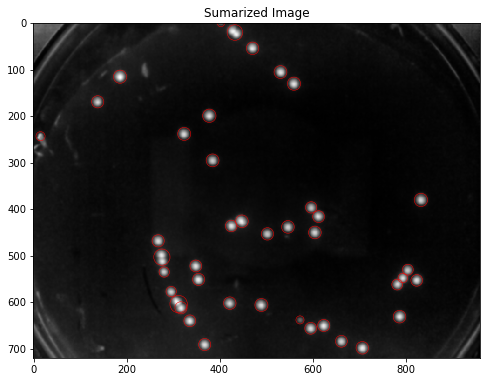

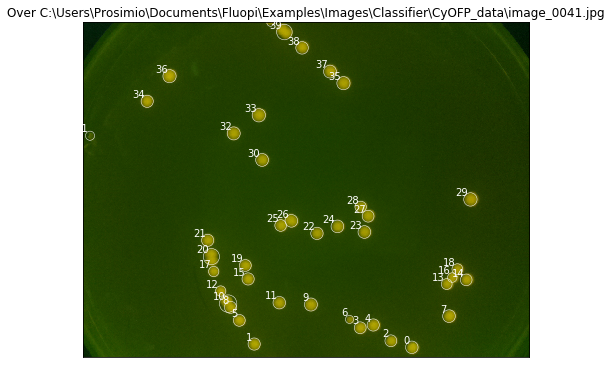

In [30]:
#blobD2 = flua.colony_blobs_id(sDatSall2,0.34,DataS2['Im']%(lim2-1))
blobD2 = flua.colony_blobs_id(sDatSall2,0.34,DataS2['Im']%(lim2),filename='Plots/Classifier/Blobs_CyOFP')

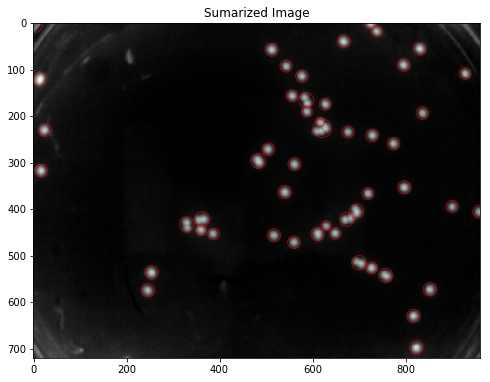

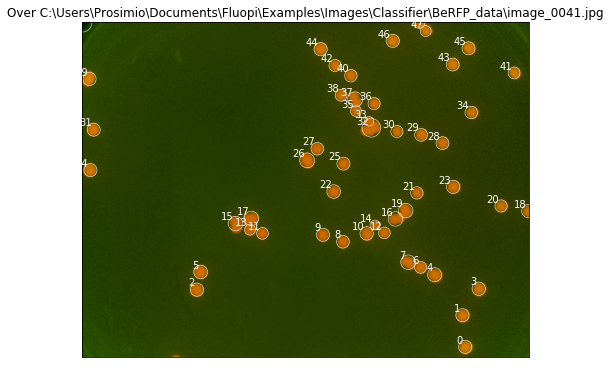

In [31]:
#blobD3 = flua.colony_blobs_id(sDatSall3,0.34,DataS3['Im']%(lim3-1))
blobD3 = flua.colony_blobs_id(sDatSall3,0.34,DataS3['Im']%(lim3),filename='Plots/Classifier/Blobs_BeRFP')

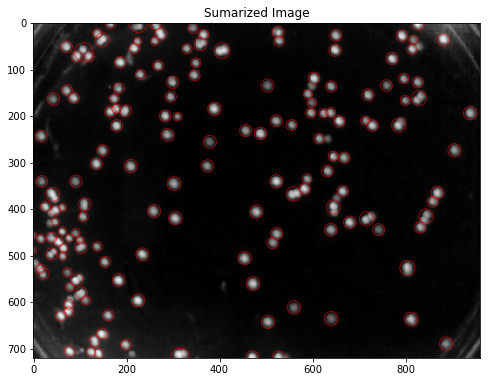

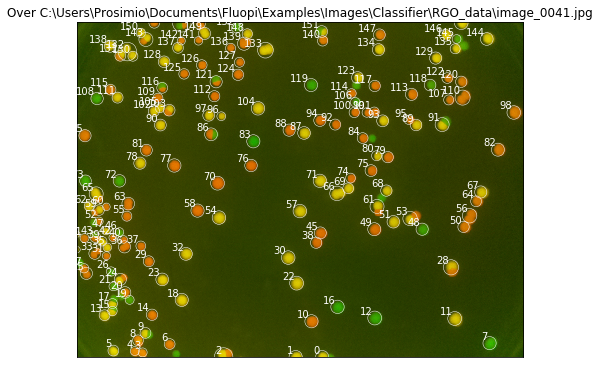

In [32]:
#blobD4 = flua.colony_blobs_id(sDatSall4,0.37,DataS4['Im']%(lim4-1))
blobD4 = flua.colony_blobs_id(sDatSall4,0.37,DataS4['Im']%(lim4),filename='Plots/Classifier/Blobs_MixFPs')

In [33]:
Rois1,RoisC1,NC1 = flua.obtain_rois(DataSB1,blobD1)
Rois2,RoisC2,NC2 = flua.obtain_rois(DataSB2,blobD2)
Rois3,RoisC3,NC3 = flua.obtain_rois(DataSB3,blobD3)
Rois4,RoisC4,NC4 = flua.obtain_rois(DataSB4,blobD4)

ROI x1 x2 y1 y2
0 609 636 237 264
ROI x1 x2 y1 y2
1 559 586 764 791
ROI x1 x2 y1 y2
2 484 513 413 442
ROI x1 x2 y1 y2
3 457 482 714 739
ROI x1 x2 y1 y2
4 442 469 825 852
ROI x1 x2 y1 y2
5 441 468 688 715
ROI x1 x2 y1 y2
6 414 443 370 399
ROI x1 x2 y1 y2
7 413 440 672 699
ROI x1 x2 y1 y2
8 396 423 88 115
ROI x1 x2 y1 y2
9 395 422 895 922
ROI x1 x2 y1 y2
10 381 408 532 559
ROI x1 x2 y1 y2
11 324 353 536 565
ROI x1 x2 y1 y2
12 313 342 665 694
ROI x1 x2 y1 y2
13 270 297 893 920
ROI x1 x2 y1 y2
14 226 255 591 620
ROI x1 x2 y1 y2
15 209 236 795 822
ROI x1 x2 y1 y2
16 186 213 925 952
ROI x1 x2 y1 y2
17 182 209 732 759
ROI x1 x2 y1 y2
18 176 205 637 666
ROI x1 x2 y1 y2
19 158 185 478 505
ROI x1 x2 y1 y2
20 144 173 406 435
ROI x1 x2 y1 y2
21 119 146 701 728
ROI x1 x2 y1 y2
22 88 115 161 188
ROI x1 x2 y1 y2
23 87 114 905 932
ROI x1 x2 y1 y2
24 68 91 16 39
ROI x1 x2 y1 y2
25 37 62 109 134
ROI x1 x2 y1 y2
26 17 42 493 518
ROI x1 x2 y1 y2
27 0 25 628 653
ROI x1 x2 y1 y2
0 609 636 237 264
ROI x1 x2 

ROI x1 x2 y1 y2
39 107 136 1 30
ROI x1 x2 y1 y2
40 101 128 564 591
ROI x1 x2 y1 y2
41 95 122 915 942
ROI x1 x2 y1 y2
42 79 106 530 557
ROI x1 x2 y1 y2
43 76 105 782 811
ROI x1 x2 y1 y2
44 43 72 498 527
ROI x1 x2 y1 y2
45 41 70 816 845
ROI x1 x2 y1 y2
46 25 54 653 682
ROI x1 x2 y1 y2
47 6 31 726 751
ROI x1 x2 y1 y2
48 0 13 712 737
ROI x1 x2 y1 y2
49 0 21 0 21
ROI x1 x2 y1 y2
0 683 712 809 838
ROI x1 x2 y1 y2
1 615 644 803 832
ROI x1 x2 y1 y2
2 560 589 232 261
ROI x1 x2 y1 y2
3 558 587 838 867
ROI x1 x2 y1 y2
4 527 558 742 773
ROI x1 x2 y1 y2
5 521 552 239 270
ROI x1 x2 y1 y2
6 513 540 714 741
ROI x1 x2 y1 y2
7 499 532 684 717
ROI x1 x2 y1 y2
8 457 486 546 575
ROI x1 x2 y1 y2
9 442 471 503 532
ROI x1 x2 y1 y2
10 439 468 597 626
ROI x1 x2 y1 y2
11 440 467 374 401
ROI x1 x2 y1 y2
12 439 466 636 663
ROI x1 x2 y1 y2
13 433 458 348 373
ROI x1 x2 y1 y2
14 424 447 618 641
ROI x1 x2 y1 y2
15 416 449 313 346
ROI x1 x2 y1 y2
16 406 439 657 690
ROI x1 x2 y1 y2
17 405 438 347 380
ROI x1 x2 y1 y2
18 

ROI x1 x2 y1 y2
104 169 200 374 405
ROI x1 x2 y1 y2
105 174 195 168 189
ROI x1 x2 y1 y2
106 161 182 588 609
ROI x1 x2 y1 y2
107 155 178 788 811
ROI x1 x2 y1 y2
108 150 177 30 57
ROI x1 x2 y1 y2
109 151 174 163 186
ROI x1 x2 y1 y2
110 145 178 813 846
ROI x1 x2 y1 y2
111 149 174 75 100
ROI x1 x2 y1 y2
112 146 171 283 308
ROI x1 x2 y1 y2
113 141 168 706 733
ROI x1 x2 y1 y2
114 142 163 580 601
ROI x1 x2 y1 y2
115 133 156 61 84
ROI x1 x2 y1 y2
116 128 153 171 196
ROI x1 x2 y1 y2
117 124 149 628 653
ROI x1 x2 y1 y2
118 121 148 746 773
ROI x1 x2 y1 y2
119 120 149 489 518
ROI x1 x2 y1 y2
120 115 140 814 839
ROI x1 x2 y1 y2
121 114 141 286 313
ROI x1 x2 y1 y2
122 108 131 785 808
ROI x1 x2 y1 y2
123 105 132 590 617
ROI x1 x2 y1 y2
124 100 125 334 359
ROI x1 x2 y1 y2
125 99 122 219 242
ROI x1 x2 y1 y2
126 80 103 257 280
ROI x1 x2 y1 y2
127 74 97 338 361
ROI x1 x2 y1 y2
128 71 98 174 201
ROI x1 x2 y1 y2
129 63 90 758 785
ROI x1 x2 y1 y2
130 61 84 109 132
ROI x1 x2 y1 y2
131 59 84 81 106
ROI x1 x2 

## ROIS Color Analysis

### Obtaining a characteristic relation for the signal of each fluorescent protein
Now we are able to compute a characteristic channel signal relation for each fluorescent protein. To get a detailed mathematical explanation remit to You can see the mathematical development at [Colony classificator maths](https://github.com/SynBioUC/FluoPi/blob/master/Maths/Colony%2Bclassificator%2Bmaths.pdf). To accomplish it, we are going to get the characteristic relation from each of the experiment involving only one fluorescent protein (data sets 1 to 3).

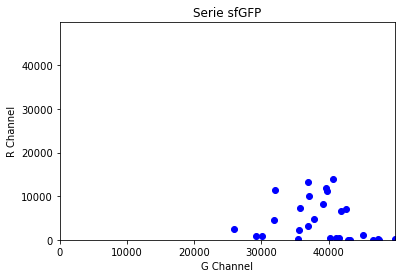

In [34]:
ChanX='G'
ChanY='R'
Xchan1,Ychan1=flup.rois_last_frame_2chan_plt(RoisC1,ChanX,ChanY,'Serie sfGFP')

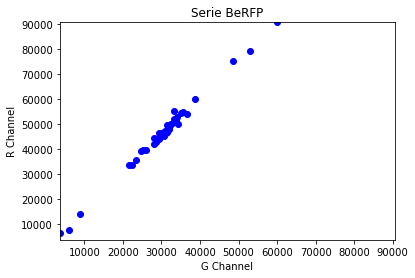

In [35]:
Xchan2,Ychan2=flup.rois_last_frame_2chan_plt(RoisC2,ChanX,ChanY,'Serie BeRFP')

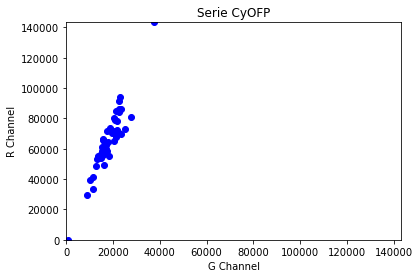

In [36]:
Xchan3,Ychan3=flup.rois_last_frame_2chan_plt(RoisC3,ChanX,ChanY,'Serie CyOFP')

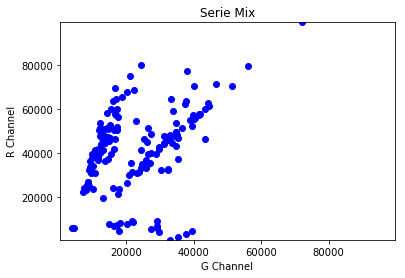

In [37]:
Xchan4,Ychan4=flup.rois_last_frame_2chan_plt(RoisC4,ChanX,ChanY,'Serie Mix')

 
1.119e-14 x + 4372


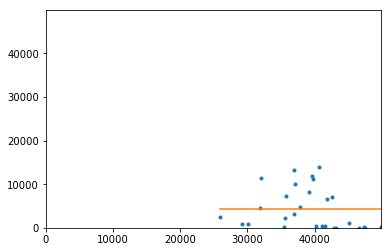

In [38]:
#fit1=flua.linear_fit(Xchan1[:,0],Ychan1[:,0])
fit1=flua.linear_fit(Xchan1[:,0],Ychan1[:,0],filename="Plots/Classifier/RG_fit1.pdf")

 
1.516 x + 288.7


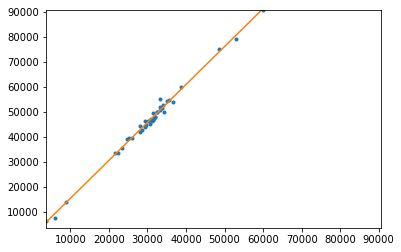

In [39]:
#fit2=flua.linear_fit(Xchan2[:,0],Ychan2[:,0])
fit2=flua.linear_fit(Xchan2[:,0],Ychan2[:,0],filename="Plots/Classifier/RG_fit2.pdf")

 
3.455 x + 3042


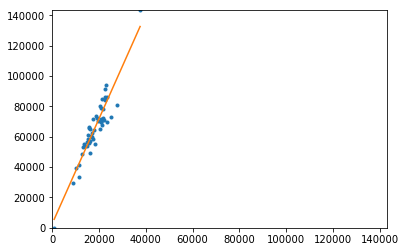

In [40]:
#fit3=flua.linear_fit(Xchan3[:,0],Ychan3[:,0])
fit3=flua.linear_fit(Xchan3[:,0],Ychan3[:,0],filename="Plots/Classifier/RG_fit3.pdf")

### Colony classification
As we have found a characteristic linear relation for each fluorescent protein, we are able to test them in the _dataset 4_ with the mixed colonies and classify them based on the nearest linear relation to each of them. 

In [41]:
ClasS4,NClasS4=flua.colony_classifier([fit1,fit2,fit3],['GFP','CyOFP','BeRFP'],Xchan4,Ychan4)

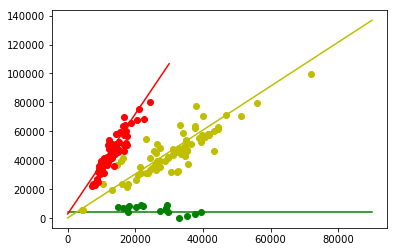

In [42]:
Xmin=0
flup.plt_lin_fit(Xmin,90000,fit1,'g')
flup.plt_lin_fit(Xmin,90000,fit2,'y')
flup.plt_lin_fit(Xmin,30000,fit3,'r')
plt.plot(NClasS4['GFP'][0],NClasS4['GFP'][1],'go')
plt.plot(NClasS4['CyOFP'][0],NClasS4['CyOFP'][1],'yo')
plt.plot(NClasS4['BeRFP'][0],NClasS4['BeRFP'][1],'ro')
plt.savefig("Plots/Classifier/Classification.pdf", transparent=True)